# **Ejercicios de pair programming Módulo 3 Sprint 1**
## **Regresión Lineal: Lección 3 - Covarianza y Correlación**
---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (20,20)
pd.options.display.max_columns = None 

En este ejercicio de pair programming seguiréis usando el dataset que seleccionasteis ayer.  

In [2]:
df = pd.read_csv("datos/soci_econ_country_profiles_resumido.csv", index_col = 0)
df.head(2)

,country,region,population_in_thousands_(2017),employment:_agriculture_(%_of_employed),employment:_industry_(%_of_employed),employment:_services_(%_of_employed),education:_government_expenditure_(%_of_gdp),quality_of_life_index,purchasing_power_index,safety_index,cost_of_living,restaurant_price_index,consumer_price_index_(2010_=_100),human_capital_index_(hci)_(scale_0-1),"inflation,_consumer_prices_(annual_%)",urban_population_(%_of_total_population)_y,"population_age_distribution_(0-14_years,_%)","population_age_distribution_(60+_years,_%)",international_migrant_stock_(%_of_total_pop.)
0,Argentina,SouthAmerica,44271,2.0,24.8,73.1,5.3,139.59,58.40,37.37,52.57,50.37,112.887108,0.611,NaN,91.749,24.9,15.4,4.8
1,Australia,Oceania,24451,2.7,21.2,76.1,5.2,176.54,101.94,57.58,80.66,77.12,115.686785,0.803,1.948647,85.904,19.0,21.0,28.2


1. Pregunta teórica: ¿Qué diferencia existe entre la covarianza y la correlación?

La covarianza tan solo indica si la relación entre las variables sigue la misma dirección o la contratria, viendose esto en el signo de la covarianza. Si la covarianza es positiva significa que cuando aumenta el valor de una variable aumenta también el de la otra. Si la covarianza es negativa cuando aumenta el valor de una de las variables, disminuye el de la otra.  
 
En la correlación se ve lo mismo que en la covarianza pero además nos indica la fuerza de la relación entre las variables. Las relaciones más fuertes se ven en valores cercanos a -1 y 1 (-1 y 1 indican correlación perfecta), mientras que los valores cercanos a 0 indican que no hay relación entre las variables.

2. Calculad la covarianza y la correlación de nuestro dataset. No nos vale solo con que la calculéis, debéis hacer una interpretación de los resultados obtenidos. Calculad solo la correlación de Pearson.

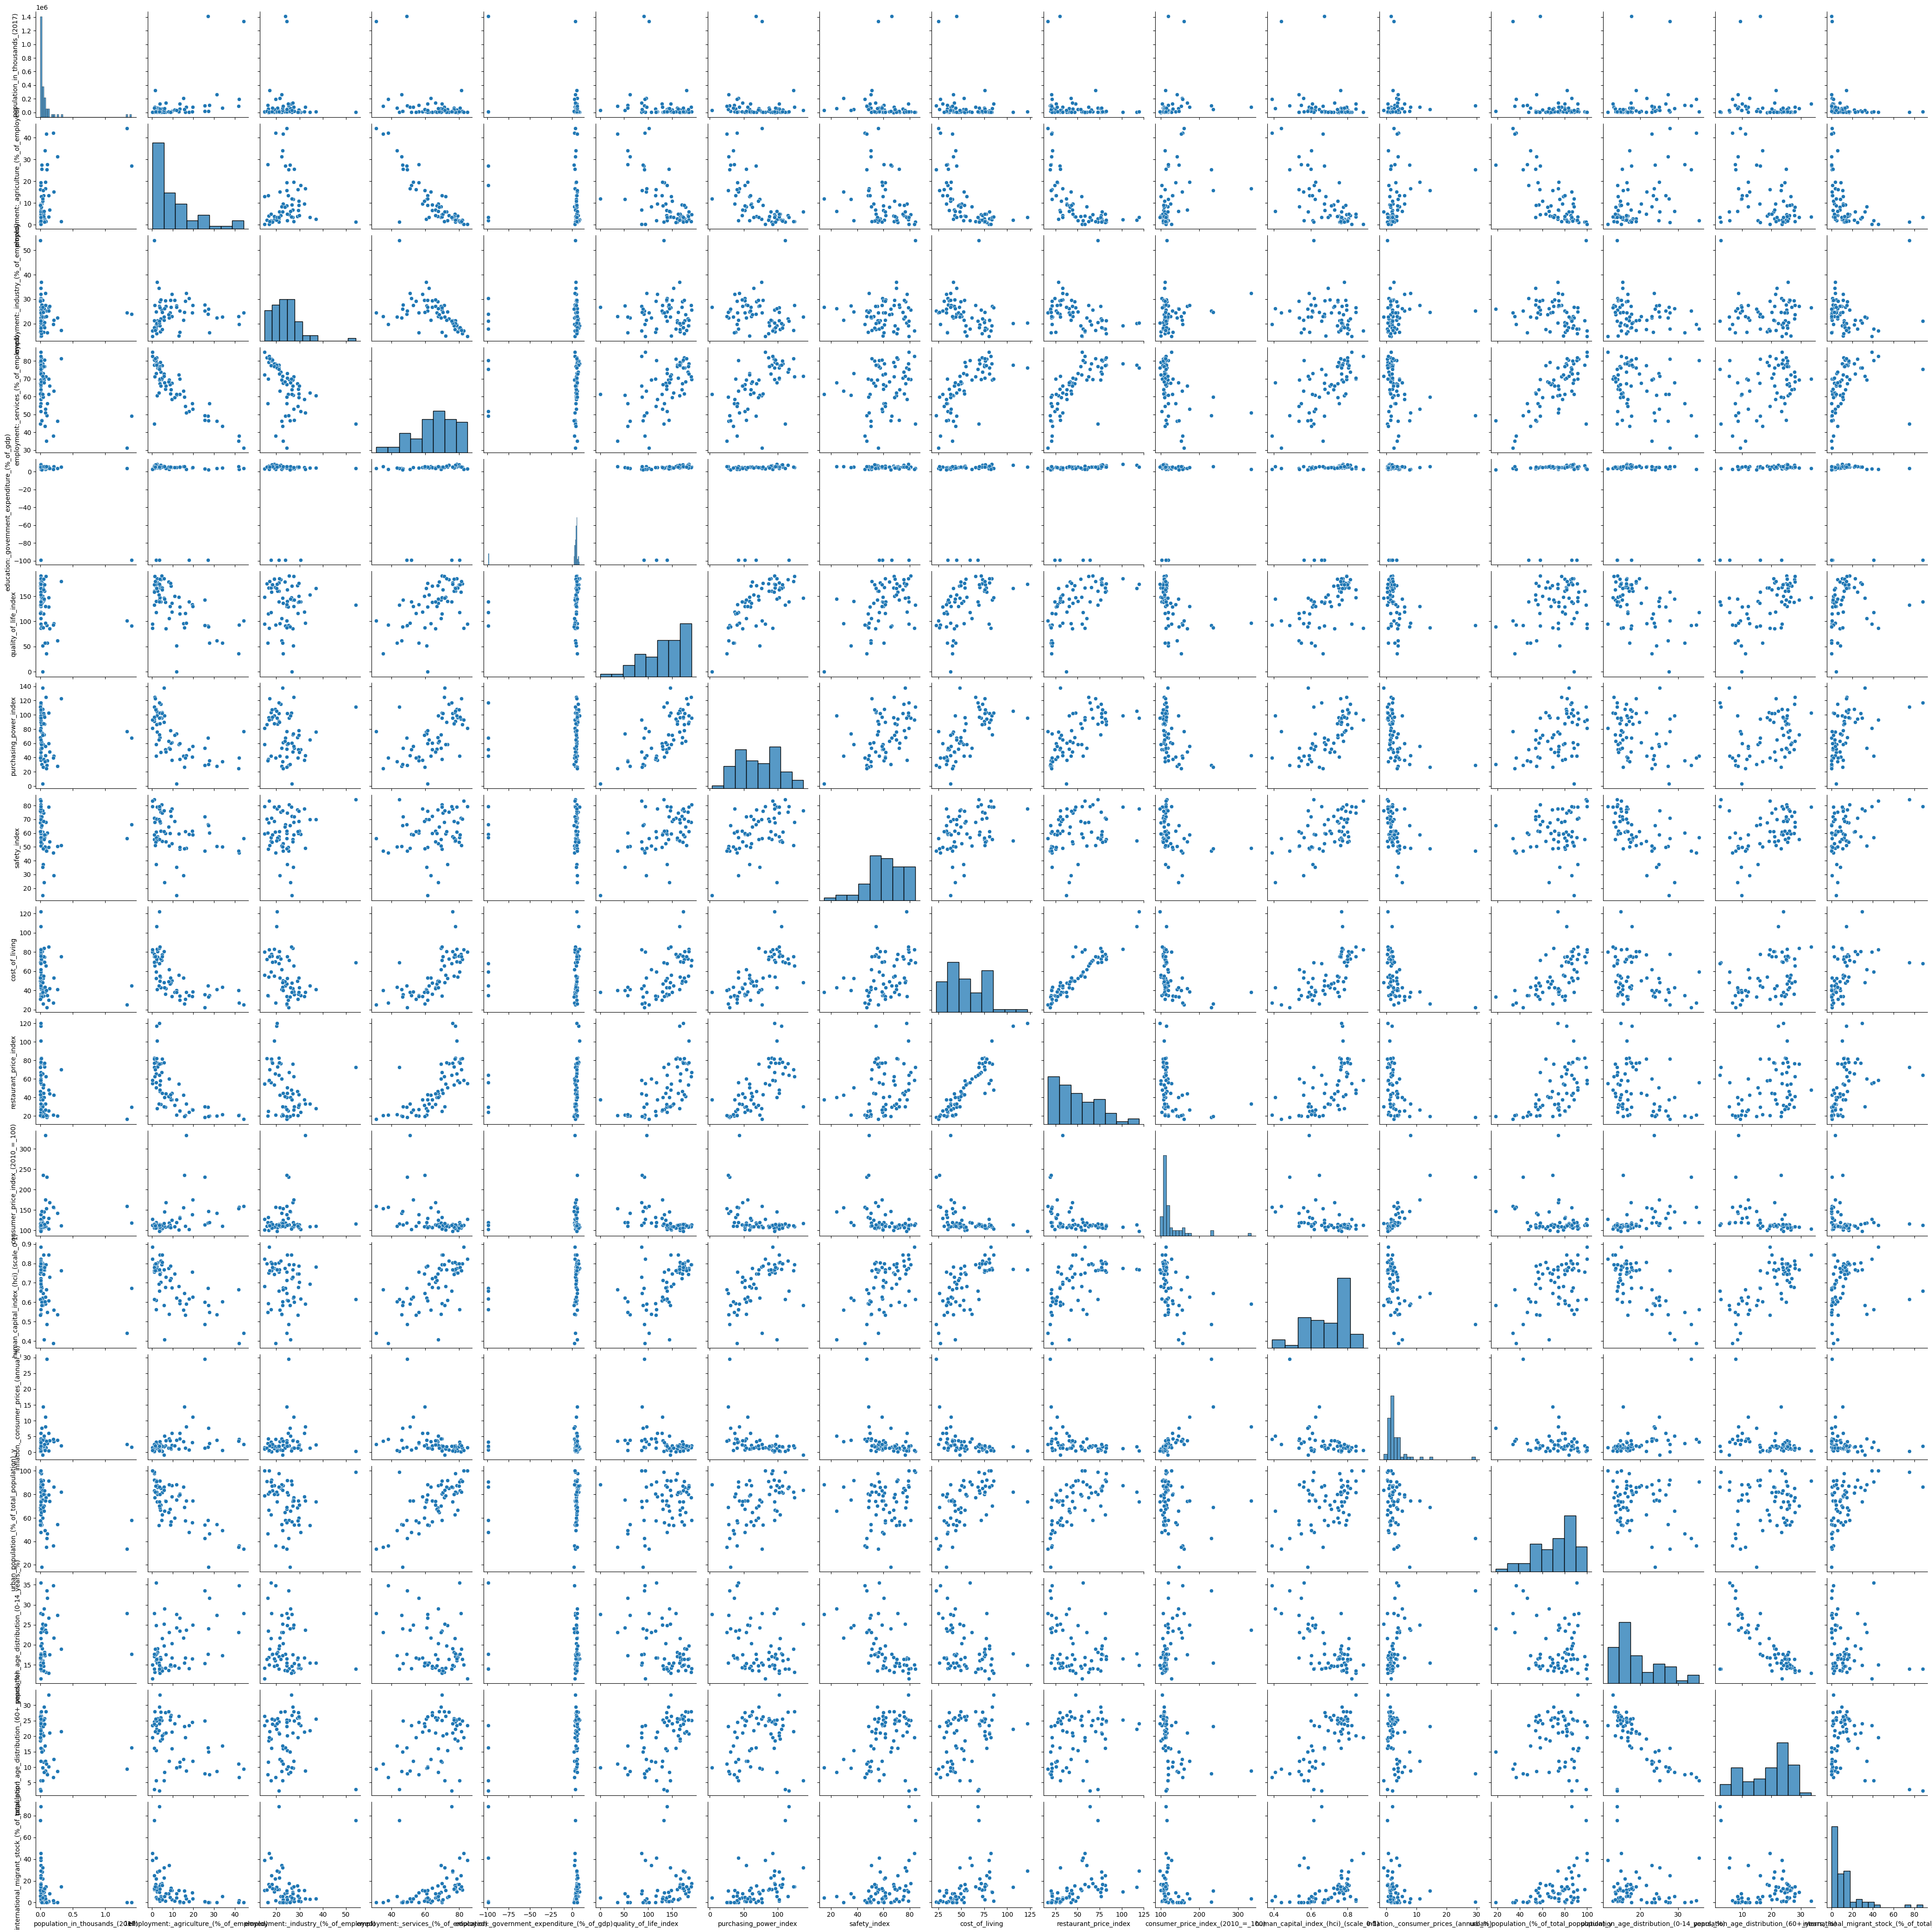

In [3]:
# sacamos primero el pairplot para hacer una primera exploración de las numéricas
df_numericas = df.select_dtypes(include = np.number)
sns.pairplot(df_numericas);

- En el pairplot podemos ver que aunque algunas variables tienen una relación lineal la mayoría tienen una relación no lineal (apreciamos una curva más que una recta) y por eso decidimos calcular la correlación con el método 'Spearman' en lugar de 'Pearson'. Aplicamos el método a todo el dataframe porque aunque algunas relaciones sean lineales el error no será muy representativo y nos permite una interpretación más ágil de los resultados.

In [4]:
# covarianza
df_numericas.cov()

,population_in_thousands_(2017),employment:_agriculture_(%_of_employed),employment:_industry_(%_of_employed),employment:_services_(%_of_employed),education:_government_expenditure_(%_of_gdp),quality_of_life_index,purchasing_power_index,safety_index,cost_of_living,restaurant_price_index,consumer_price_index_(2010_=_100),human_capital_index_(hci)_(scale_0-1),"inflation,_consumer_prices_(annual_%)",urban_population_(%_of_total_population)_y,"population_age_distribution_(0-14_years,_%)","population_age_distribution_(60+_years,_%)",international_migrant_stock_(%_of_total_pop.)
population_in_thousands_(2017),5.672667e+10,1.258180e+06,-49489.814545,-1.208223e+06,-1.921298e+06,-2.310289e+06,-234202.274671,-328224.254322,-1.036174e+06,-1.409137e+06,1.230950e+06,-7591.914087,11601.513975,-1.228867e+06,271990.754406,-376680.377483,-816870.019161
employment:_agriculture_(%_of_employed),1.258180e+06,1.205948e+02,1.360149,-1.219522e+02,-2.376983e+01,-2.924421e+02,-202.500448,-49.072989,-1.474145e+02,-1.825817e+02,1.636871e+02,-0.828262,14.712111,-1.502375e+02,29.870373,-35.533450,-79.390825
employment:_industry_(%_of_employed),-4.948981e+04,1.360149e+00,38.376347,-3.968304e+01,4.100475e+00,-1.460244e+01,-23.946927,11.043266,-4.080189e+01,-4.613619e+01,3.656085e+01,-0.113809,2.465644,-1.579182e+01,-7.146478,-3.015138,2.790783
employment:_services_(%_of_employed),-1.208223e+06,-1.219522e+02,-39.683037,1.615813e+02,1.939553e+01,3.071535e+02,226.478643,38.132959,1.881214e+02,2.286167e+02,-2.002527e+02,0.941898,-17.175859,1.659383e+02,-22.761093,38.589939,76.575245
education:_government_expenditure_(%_of_gdp),-1.921298e+06,-2.376983e+01,4.100475,1.939553e+01,6.847284e+02,1.394600e+02,42.071220,-29.091085,4.654183e+01,6.676813e+01,7.269864e+01,0.554859,5.447478,2.225501e+01,-11.866576,56.338983,-136.534542
quality_of_life_index,-2.310289e+06,-2.924421e+02,-14.602441,3.071535e+02,1.394600e+02,1.772999e+03,894.103497,299.492861,4.614750e+02,6.293552e+02,-6.671830e+02,2.582237,-57.106645,2.175842e+02,-118.741599,187.357699,111.566813
purchasing_power_index,-2.342023e+05,-2.025004e+02,-23.946927,2.264786e+02,4.207122e+01,8.941035e+02,898.061585,196.433878,4.374981e+02,4.935993e+02,-4.676223e+02,1.750123,-55.680893,2.481094e+02,-62.949651,53.774736,231.253204
safety_index,-3.282243e+05,-4.907299e+01,11.043266,3.813296e+01,-2.909108e+01,2.994929e+02,196.433878,200.519340,1.058037e+02,9.705651e+01,-1.841728e+02,0.821228,-19.064946,2.726022e+01,-47.405461,41.870822,95.142120
cost_of_living,-1.036174e+06,-1.474145e+02,-40.801891,1.881214e+02,4.654183e+01,4.614750e+02,437.498062,105.803712,4.368209e+02,4.805713e+02,-3.374167e+02,1.578599,-39.216560,2.146246e+02,-46.277554,57.485407,157.933327
restaurant_price_index,-1.409137e+06,-1.825817e+02,-46.136187,2.286167e+02,6.676813e+01,6.293552e+02,493.599305,97.056507,4.805713e+02,6.187290e+02,-3.548079e+02,1.667569,-38.662982,2.559821e+02,-44.717337,64.145967,182.302295


- Las variables que tienen covarianza negativa están inversamente relacionadas y las que tienen el signo positivo están directamente relacionadas

In [5]:
# correlacion
correl = df_numericas.corr(method='spearman')
correl

,population_in_thousands_(2017),employment:_agriculture_(%_of_employed),employment:_industry_(%_of_employed),employment:_services_(%_of_employed),education:_government_expenditure_(%_of_gdp),quality_of_life_index,purchasing_power_index,safety_index,cost_of_living,restaurant_price_index,consumer_price_index_(2010_=_100),human_capital_index_(hci)_(scale_0-1),"inflation,_consumer_prices_(annual_%)",urban_population_(%_of_total_population)_y,"population_age_distribution_(0-14_years,_%)","population_age_distribution_(60+_years,_%)",international_migrant_stock_(%_of_total_pop.)
population_in_thousands_(2017),1.000000,0.343351,-0.058540,-0.279261,-0.143205,-0.359775,-0.207390,-0.501957,-0.281161,-0.358463,0.487912,-0.307680,0.416392,-0.137377,0.389022,-0.301389,-0.507871
employment:_agriculture_(%_of_employed),0.343351,1.000000,0.275443,-0.828677,-0.298196,-0.579413,-0.714177,-0.384672,-0.783302,-0.814898,0.435156,-0.649493,0.436576,-0.708130,0.339598,-0.340140,-0.715910
employment:_industry_(%_of_employed),-0.058540,0.275443,1.000000,-0.644879,-0.274409,-0.138167,-0.249611,0.069794,-0.457133,-0.428786,0.103631,-0.217952,0.193708,-0.360683,-0.215993,0.107590,-0.341814
employment:_services_(%_of_employed),-0.279261,-0.828677,-0.644879,1.000000,0.419395,0.585389,0.649374,0.237636,0.796342,0.823010,-0.451038,0.639271,-0.393846,0.692741,-0.182060,0.307278,0.681874
education:_government_expenditure_(%_of_gdp),-0.143205,-0.298196,-0.274409,0.419395,1.000000,0.542838,0.385616,-0.113586,0.361669,0.468336,-0.230117,0.384330,-0.095763,0.219872,0.124581,0.259620,0.205207
quality_of_life_index,-0.359775,-0.579413,-0.138167,0.585389,0.542838,1.000000,0.715771,0.444342,0.600250,0.685322,-0.653846,0.653022,-0.455540,0.217662,-0.413533,0.611025,0.463088
purchasing_power_index,-0.207390,-0.714177,-0.249611,0.649374,0.385616,0.715771,1.000000,0.446618,0.741572,0.722563,-0.454716,0.630676,-0.548031,0.459644,-0.316930,0.248698,0.596309
safety_index,-0.501957,-0.384672,0.069794,0.237636,-0.113586,0.444342,0.446618,1.000000,0.358317,0.311216,-0.449730,0.504510,-0.551700,0.136335,-0.637646,0.397904,0.388820
cost_of_living,-0.281161,-0.783302,-0.457133,0.796342,0.361669,0.600250,0.741572,0.358317,1.000000,0.911919,-0.524130,0.733198,-0.586172,0.632049,-0.338184,0.356043,0.655455
restaurant_price_index,-0.358463,-0.814898,-0.428786,0.823010,0.468336,0.685322,0.722563,0.311216,0.911919,1.000000,-0.510674,0.671665,-0.491672,0.659193,-0.275626,0.357404,0.719745


- En el siguiente ejercicio, en el heatmap analizamos los resultados de correlación

3. Con los resultados de la correlación del ejercicio anterior, cread un heatmap.

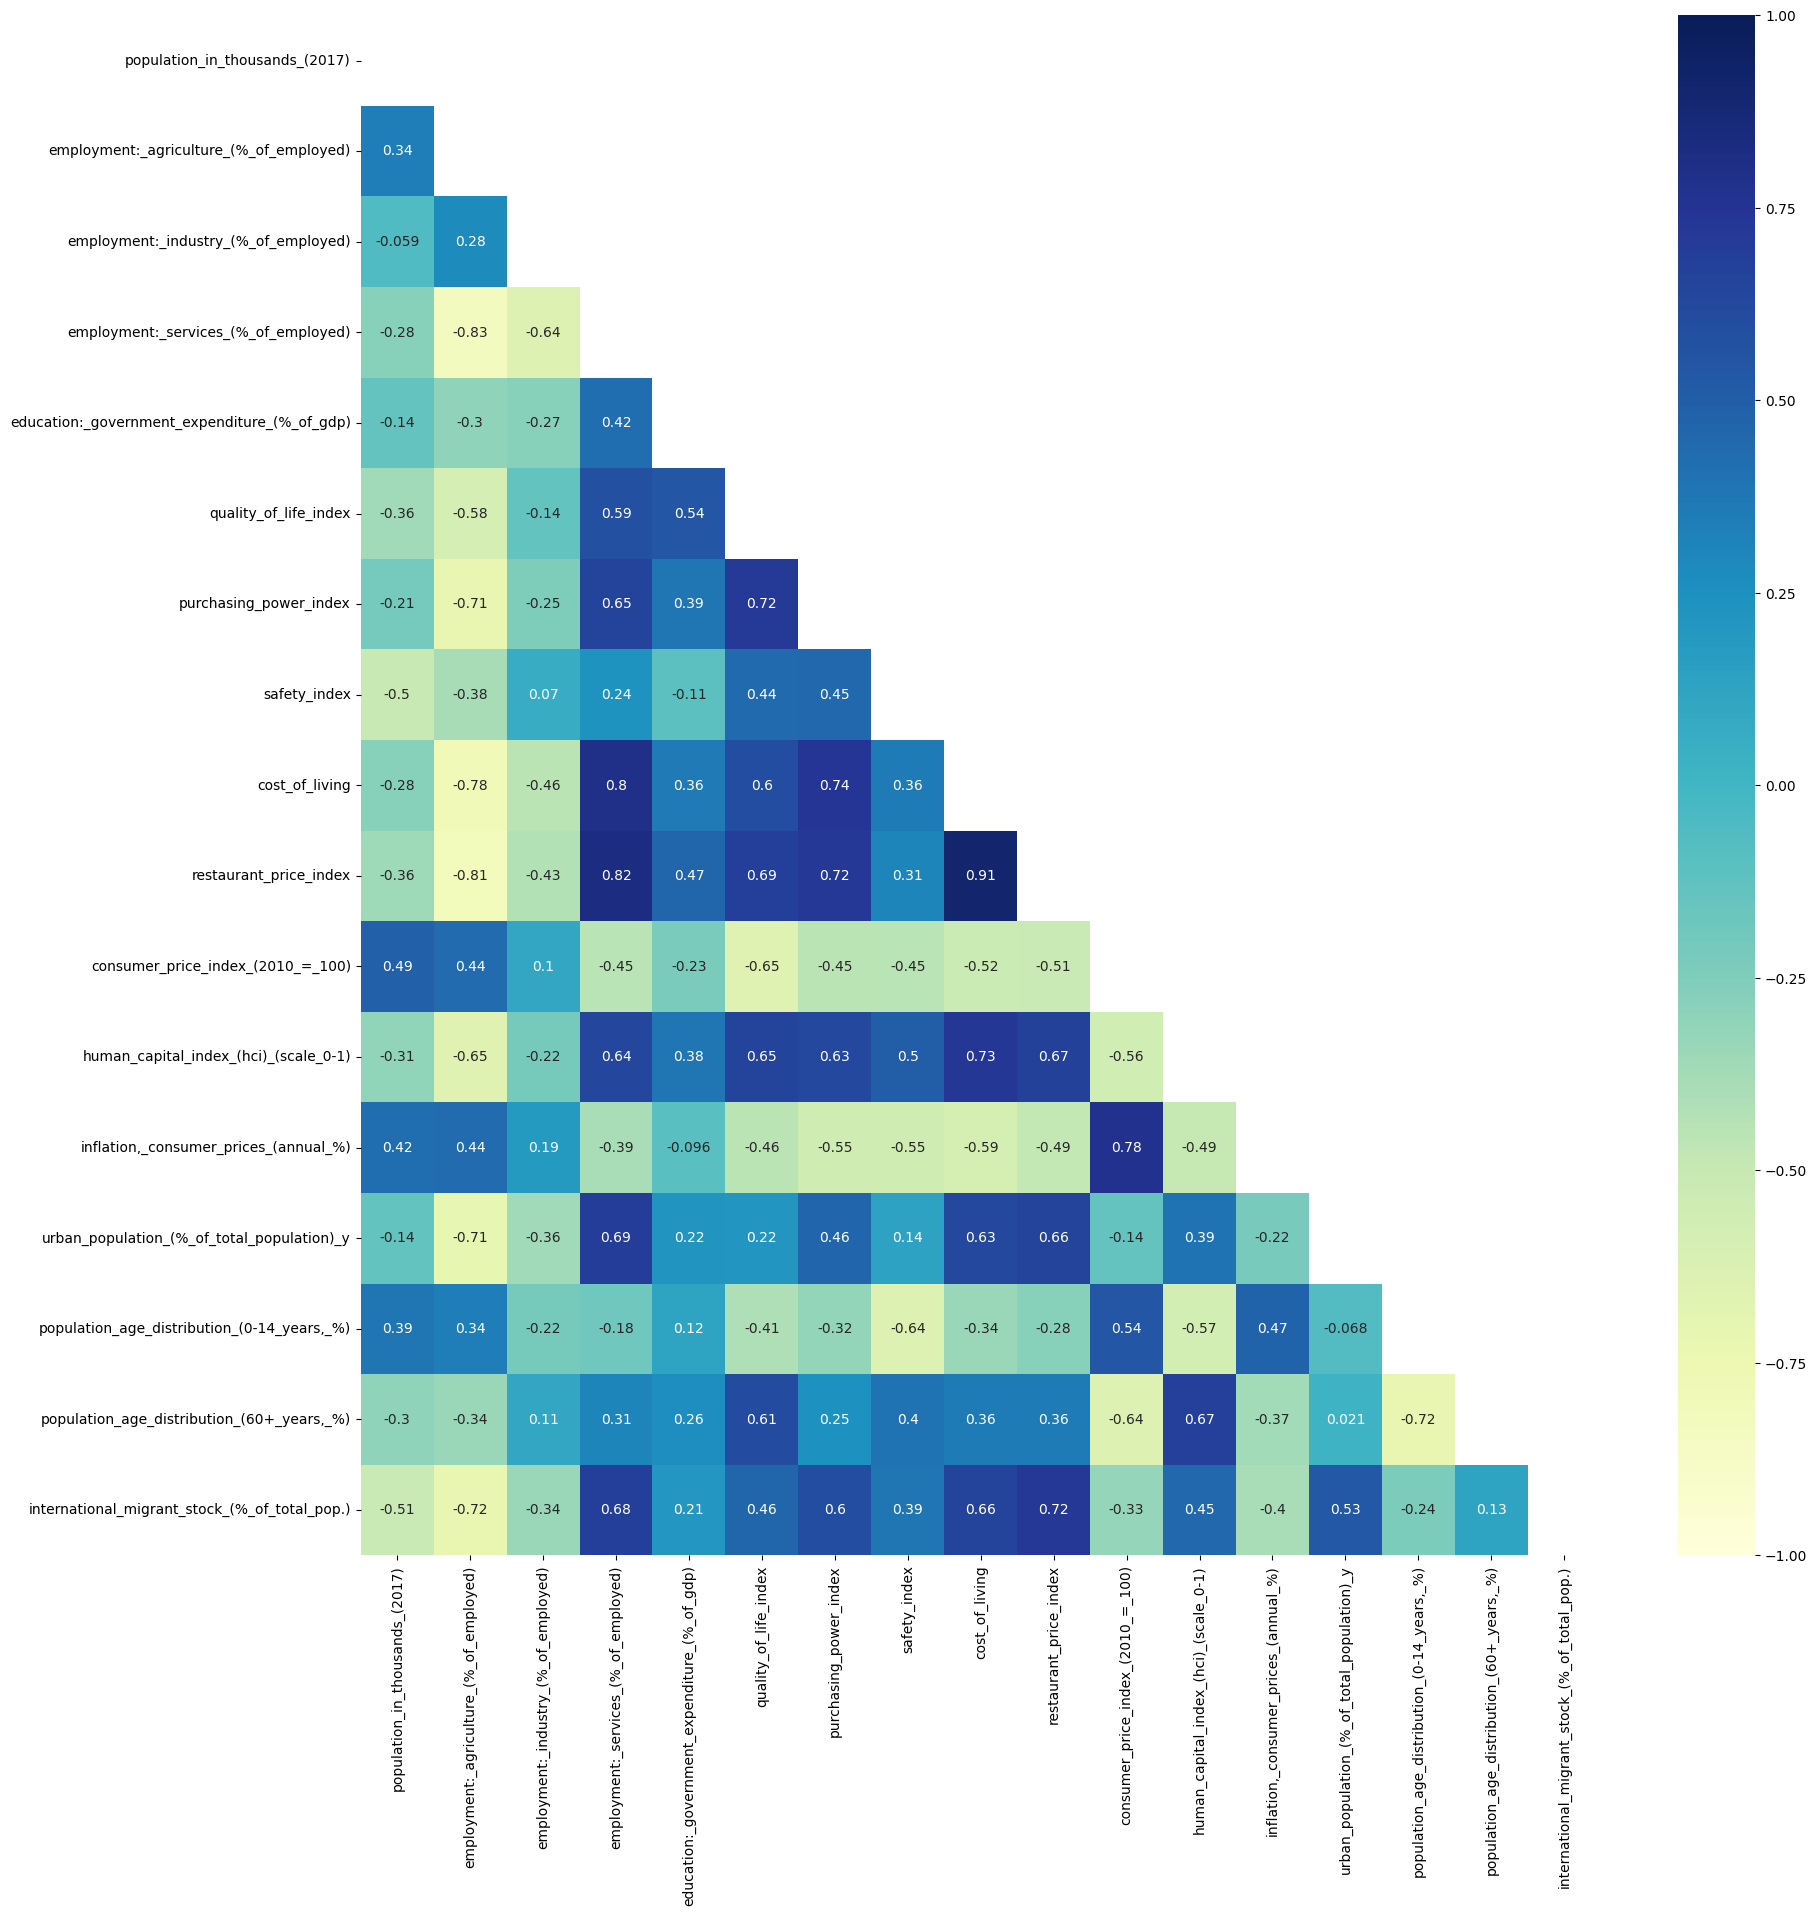

In [6]:
# sacamos el heatmap
mask = np.triu(np.ones_like(correl, dtype = np.bool_))

sns.heatmap(correl, 
           cmap = "YlGnBu", 
            mask = mask,
           annot = True,
           vmin= -1,
           vmax= 1)

plt.savefig('datos/heatmap.jpeg');

- Como vemos la variable respuesta tiene una correlación positiva con las siguientes columnas:
    - correlación muy alta con las columnas 'cost_of_living' y 'employment:_services_(%_of_employed)'
    - correlación alta con 'quality_of_life_index', 'purchasing_power_index', 'international_migrant_stock_(%_of_total_pop.)', 'urban_population_(%_of_total_population)_y', 'human_capital_index_(hci)_(scale_0-1)'
    - correlación moderada con la columna 'education:_government_expenditure_(%_of_gdp)'
    - correlación baja con la columna 'safety_index' y population_age_distribution_(60+_years,_%)
- También tiene una correlación negativa con las siguientes columnas:
    - correlación muy alta con 'employment:_agriculture_(%_of_employed)'
    - correlación moderada con 'employment:_industry_(%_of_employed)', 'inflation,_consumer_prices_(annual_%)' y 'consumer_price_index_(2010_=_100)	'
    - correlación baja con 'population_in_thousands_(2017)' y 'population_age_distribution_(0-14_years,_%)'

4. Guardad la gráfica del heatmap.

- Se ha incluido el código para guardarlo en el ejecicio anterior